In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn


In [2]:
#變數類型間的關係

    #連續 vs 連續:Pearson 相關係數
    #離散 vs 離散:Cramer's V係數
    #離散 vs 連續: Point biserial’s correlation / Cohen's ds / eta-squared
    
#方法
    
    #數值型
    #圖像型

In [3]:
#Pearson 相關係數
Image(url='http://cumatrixfile.cupoy.com/0000017554B6B9E5000000096375706F795F72656C656173654349/marathon/1603345870375')

In [4]:
#Cramer’s V 係數

#Step1：用交叉列連表(contingency table)整理資料
    # contTable = pd.crosstab(資料1,資料2)
#Step2：計算資料自由度 df  df = MIN(r,c)-1
    # df = min(contTable.shape[0],contTable.shape[1])-1
#Step3：運用 researchpy 套件，計算出 Cramer's V 係數
    # crosstab, res = researchpy.crosstab(資料1,資料2 , test = 'chi-square')
    # valiate_CramerV( df, res.lo[2,'results'])
Image(url='http://cumatrixfile.cupoy.com/0000017554B6B9E5000000096375706F795F72656C656173654349/marathon/1603345870389')

In [5]:
#Eta Squared (η2)

#import pingouin as pg

#Step1：取出資料
#Step2：運用 pg.anova 計算三種變異數
    # aov = pg.anova(dv= 連續行變數, between = 離散型變數, data=data, detailed= True)
#Step3：變異數換算得到 Eta Squared (η2)
    # etaSq = aov.SS[0] / (avo.ss[0] + aov.ss[1])
Image(url='http://cumatrixfile.cupoy.com/0000017554B6B9E5000000096375706F795F72656C656173654349/marathon/1603345870404')

In [6]:
data={'sex': ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'insomnia':['Y','N','N','N','N','N','Y','Y','Y','N','Y','N','N','N','N','N','Y','Y','Y','N'],
     'age':[23,40,5,30,1,40,16,27,43,8,23,39,5,29,1,42,13,29,41,10],
     'height':[180,170,100,176,70,160,170,166,155,35,170,168,101,175,72,163,169,163,151,40],
     'weight':[100,68,20,70,10,45,50,58,58,17,101,65,22,79,12,40,53,52,56,14]}
#轉成 dataframe格式 
data=pd.DataFrame(data)
display(data)

print(data.info())

,sex,insomnia,age,height,weight
0,Male,Y,23,180,100
1,Male,N,40,170,68
2,Male,N,5,100,20
3,Male,N,30,176,70
4,Male,N,1,70,10
5,Female,N,40,160,45
6,Female,Y,16,170,50
7,Female,Y,27,166,58
8,Female,Y,43,155,58
9,Female,N,8,35,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       20 non-null     object
 1   insomnia  20 non-null     object
 2   age       20 non-null     int64 
 3   height    20 non-null     int64 
 4   weight    20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes
None


In [7]:
# 連續 vs. 連續 
corr, _=stats.pearsonr(data['height'], data['weight'])
print(corr)

0.8380879580762451


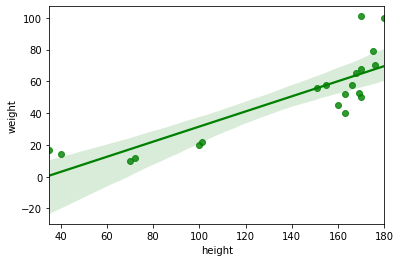

In [8]:
g = sns.regplot(x="height", y="weight", color="g",data=data)
#年齡和身高有關連

In [9]:
# 離散 vs. 離散
import researchpy
contTable = pd.crosstab(data['sex'], data['insomnia'])
contTable

insomnia,N,Y
sex,,
Female,4,6
Male,8,2


In [10]:
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [11]:
crosstab, res = researchpy.crosstab(data['sex'], data['insomnia'], test='chi-square')
print(res)
print("Cramer's value is",res.loc[2,'results'])
#介於 0.4~0.69 >> medium

                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    3.3333
1                    p-value =    0.0679
2               Cramer's phi =    0.4082
Cramer's value is 0.4082


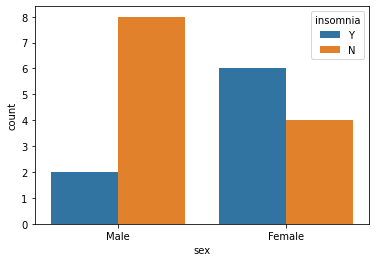

In [12]:
g= sns.countplot(x="sex", hue="insomnia", data=data)

In [13]:
# 離散 vs. 連續 
import pingouin as pg
aov = pg.anova(dv='weight', between='insomnia', data=data, detailed=True)
Image(url='http://cumatrixfile.cupoy.com/0000017554B6B9E5000000096375706F795F72656C656173654349/marathon/1603345870410')

In [14]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq
# 介於 0.14~1之間 >>> large

0.2538284036081393

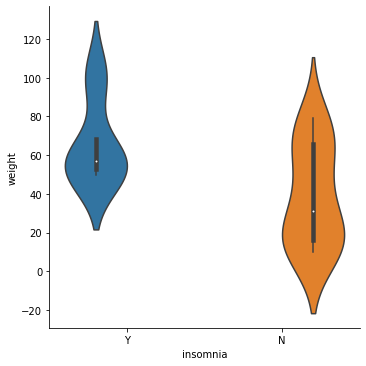

In [15]:
g = sns.catplot(x="insomnia", y="weight", hue="insomnia",
               data=data, kind="violin")

# HW

In [16]:
train = pd.read_csv('Titanic_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
#!!!! 記得轉換數據為類別
train['Survived'] = train['Survived'].astype('object')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [18]:
#Q1：透過數值法計算 Age 和 Survived 是否有相關性？
# 數值 vs. 類別
target=train[['Age','Survived']].dropna(axis=0)
aov = pg.anova(dv='Age', between='Survived', data=target, detailed=True)
display(aov)
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)
# <0.01 Negligible

,Source,SS,DF,MS,F,p-unc,np2
0,Survived,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


0.0059630974469252


In [19]:
#Q2：透過數值法計算 Sex 和 Survived 是否有相關性？
# 類別 vs. 類別
target = train[['Sex','Survived']].dropna(axis=0)
contTable = pd.crosstab(target['Sex'], target['Survived'])
print(f'contTable: {contTable}')
df = min(contTable.shape[0], contTable.shape[1]) - 1
print(f'df: {df}')
crosstab, res = researchpy.crosstab(target['Sex'], target['Survived'], test='chi-square')
print(f'res: {res}')
print("Cramer's value is",res.loc[2,'results'])
# df1, >0.5 Large

contTable: Survived    0    1
Sex               
female     81  233
male      468  109
df: 1
res:                 Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434
Cramer's value is 0.5434


In [20]:
#Q3：透過數值法計算 Age 和 Fare 是否有相關性？
# 數值 vs. 數值
target = train[['Age','Fare']].dropna(axis=0)
corr, _=stats.pearsonr(target['Age'], target['Fare'])
print(corr)
# <0.1 無線性關係

0.0960666917690389
